In [1]:
import glob
import pandas

# Potential payoff cue

## Left STN

In [2]:
pandas.read_csv('/home/gdholla1/projects/bias/data/derivatives/glm_fits_level3/grf_localmax_txt_file/_contrast_9_mask_STh_L_shift_-1.5/_threshold_2.3/_grf_cluster0/zstat1_localmax.txt', sep='\t')

,Cluster Index,Value,x,y,z,Unnamed: 5


In [5]:
pandas.read_csv('/home/gdholla1/projects/bias/data/derivatives/glm_fits_level3/grf_localmax_txt_file/_contrast_9_fwhm_8.0_mask_STh_L_C_shift_-1.5/_threshold_2.3/_grf_cluster0/zstat1_localmax.txt', sep='\t')

IOError: File /home/gdholla1/projects/bias/data/derivatives/glm_fits_level3/grf_localmax_txt_file/_contrast_9_fwhm_8.0_mask_STh_L_C_shift_-1.5/_threshold_2.3/_grf_cluster0/zstat1_localmax.txt does not exist

In [13]:
pandas.read_csv('/home/gdholla1/projects/bias/data/derivatives/glm_fits_level3/grf_localmax_txt_file/_contrast_10_mask_STh_L_shift_-1.5/_threshold_2.6/_grf_cluster0/zstat1_localmax.txt', sep='\t')

,Cluster Index,Value,x,y,z,Unnamed: 5
0,1,3.76,141,129,84,NaN
1,1,3.46,132,129,79,NaN
2,1,3.45,132,128,81,NaN
3,1,3.45,143,113,79,NaN
4,1,3.32,128,127,77,NaN
5,1,3.24,133,121,77,NaN


In [12]:
pandas.read_csv('/home/gdholla1/projects/bias/data/derivatives/glm_fits_level3/grf_localmax_txt_file/_contrast_10_mask_STh_L_shift_-1.5/_threshold_2.6/_grf_cluster0/zstat1_localmax.txt', sep='\t').groupby(['Cluster Index']).mean()

,Value,x,y,z,Unnamed: 5
Cluster Index,,,,,
1,3.446667,134.833333,124.5,79.5,NaN


In [16]:
import nibabel as nb

In [17]:
thresholded_mask = nb.load('/home/gdholla1/projects/bias/data/derivatives/glm_fits_level3/grf_thresholded_zstats_file/_contrast_10_mask_STh_L_shift_-1.5/_threshold_2.6/_grf_cluster0/zstat1_threshold.nii.gz').get_data() > 0

In [21]:
segment_a = [nb.load(fn).get_data()[thresholded_mask].mean() for fn in sorted(glob.glob('/home/gdholla1/projects/bias/data/derivatives/glm_fits_level3/transformed_copes/_contrast_10_mask_STh_L_A_shift_-1.5/_transformer*/cope1_trans.nii.gz'))]
segment_b = [nb.load(fn).get_data()[thresholded_mask].mean() for fn in sorted(glob.glob('/home/gdholla1/projects/bias/data/derivatives/glm_fits_level3/transformed_copes/_contrast_10_mask_STh_L_B_shift_-1.5/_transformer*/cope1_trans.nii.gz'))]
segment_c = [nb.load(fn).get_data()[thresholded_mask].mean() for fn in sorted(glob.glob('/home/gdholla1/projects/bias/data/derivatives/glm_fits_level3/transformed_copes/_contrast_10_mask_STh_L_C_shift_-1.5/_transformer*/cope1_trans.nii.gz'))]

In [27]:
results = pandas.DataFrame({'Segment A':segment_a, 'Segment B':segment_b, 'Segment C':segment_c, 'subj_idx':np.arange(19)})

In [44]:
results

,Segment A,Segment B,Segment C,subj_idx
0,0.263228,0.265961,0.183939,0
1,0.181610,0.138310,0.082020,1
2,0.289317,0.480574,0.172316,2
3,0.128953,0.196442,0.125137,3
4,0.325487,0.236402,0.123604,4
5,0.238372,0.194793,0.387102,5
6,0.141034,-0.086280,0.032074,6
7,0.484843,0.406101,0.759365,7
8,0.022811,0.013248,0.065018,8
9,0.345208,0.119877,0.255678,9


In [42]:
sp.stats.ttest_1samp(results, 0)

Ttest_1sampResult(statistic=array([ 4.34781234,  3.8669607 ,  3.3547895 ,  6.97137002]), pvalue=array([  3.87760878e-04,   1.12959897e-03,   3.52736826e-03,
         1.64113838e-06]))

In [38]:
tmp = pandas.melt(results, id_vars='subj_idx')
tmp['subj_idx'] = tmp['subj_idx'].astype('category')

In [39]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [40]:
tmp.head()

,subj_idx,variable,value
0,0,Segment A,0.263228
1,1,Segment A,0.181610
2,2,Segment A,0.289317
3,3,Segment A,0.128953
4,4,Segment A,0.325487


In [49]:
sns.set_context('poster')
sns.set_style('whitegrid')

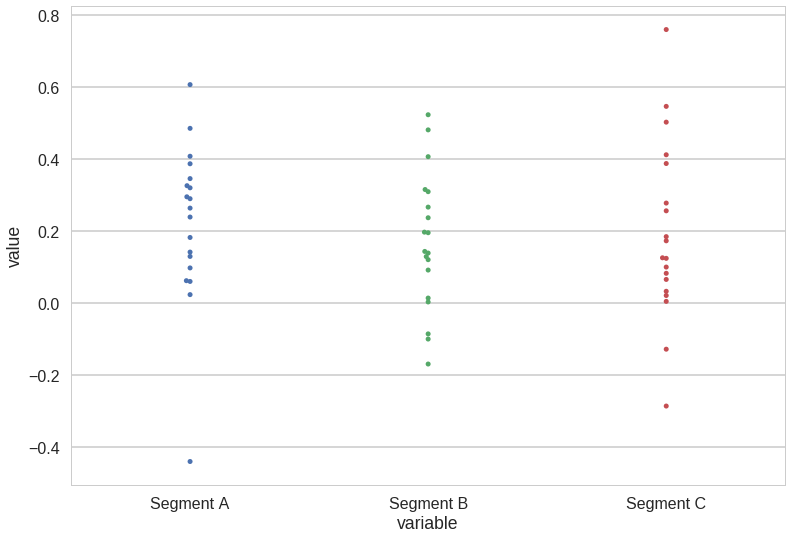

In [50]:
sns.swarmplot('variable', 'value', data=tmp)

In [41]:
%%R -i tmp

print(summary(aov(value ~ variable + Error(subj_idx/(variable)), data=tmp)))

library(BayesFactor)

bf = anovaBF(value ~ variable + subj_idx, data = tmp, whichRandom="subj_idx")

print(bf)

/usr/local/lib/python2.7/dist-packages/rpy2/robjects/pandas2ri.py:57: UserWarning: Error while trying to convert the column "subj_idx". Fall back to string conversion. The error is: Converting pandas "Category" series to R factor is only possible when categories are strings.
  (name, str(e)))



Error: subj_idx
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 18  2.122  0.1179               

Error: subj_idx:variable
          Df Sum Sq Mean Sq F value Pr(>F)
variable   2 0.0269 0.01343   0.916  0.409
Residuals 36 0.5278 0.01466               
  |======================================================================| 100%
Bayes factor analysis
--------------
[1] variable + subj_idx : 0.2647856 ±0.56%

Against denominator:
  value ~ subj_idx 
---
Bayes factor type: BFlinearModel, JZS



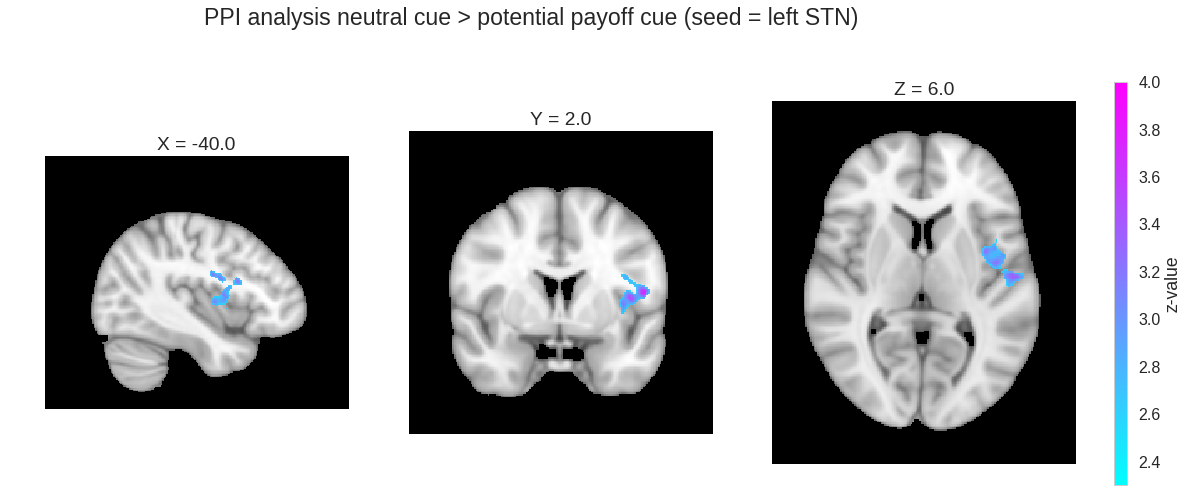

In [114]:
zmap = nb.load('/home/gdholla1/projects/bias/data/derivatives/glm_fits_level3/grf_thresholded_zstats_file/_contrast_10_mask_STh_L_shift_-1.5/_threshold_2.6/_grf_cluster0/zstat1_threshold.nii.gz').get_data()
zmap = np.ma.masked_equal(zmap, 0)

mni = nb.load('/home/gdholla1/data/MNI_1mm.nii.gz').get_data()


ax = plt.subplot(131)
plt.imshow(mni[130, :, :].T, origin='lower', cmap=plt.cm.gray)
plt.imshow(zmap[130, :, :].T, origin='lower', cmap=plt.cm.cool, interpolation='nearest', vmin=2.3, vmax=4)
# plt.xlim(0, 300)
plt.axis('off')
plt.title('X = -40.0')

plt.subplot(132)
plt.imshow(mni[:, 128, :].T, origin='lower', cmap=plt.cm.gray)
plt.imshow(zmap[:, 128, :].T, origin='lower', cmap=plt.cm.cool, interpolation='nearest', vmin=2.3, vmax=4)
plt.axis('off')
plt.title('Y = 2.0')

plt.subplot(133)
plt.imshow(mni[:, :, 78].T, origin='lower', cmap=plt.cm.gray)
im = plt.imshow(zmap[:, :, 78].T, origin='lower', cmap=plt.cm.cool, interpolation='nearest', vmin=2.3, vmax=4)
plt.axis('off')
plt.title('Z = 6.0')

fig = plt.gcf()

fig.subplots_adjust(right=0.92)
cbar_ax = fig.add_axes([0.95, 0.15, 0.01, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax, )
cbar.set_label('z-value')

plt.gcf().set_size_inches(18, 8)

plt.suptitle('PPI analysis neutral cue > potential payoff cue (seed = left STN)')
# ax.tight_layout(plt.gcf(), rect=[0, 0.03, 1, 0.95])  

# plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('/home/gdholla1/projects/bias/reports/figures/ppi_neutral_payoff_left_stn_mni.pdf')

## Right STN

In [14]:
pandas.read_csv('/home/gdholla1/projects/bias/data/derivatives/glm_fits_level3/grf_localmax_txt_file/_contrast_9_mask_STh_R_shift_-1.5/_threshold_2.6/_grf_cluster0/zstat1_localmax.txt', sep='\t')

,Cluster Index,Value,x,y,z,Unnamed: 5


In [15]:
pandas.read_csv('/home/gdholla1/projects/bias/data/derivatives/glm_fits_level3/grf_localmax_txt_file/_contrast_10_mask_STh_R_shift_-1.5/_threshold_2.6/_grf_cluster0/zstat1_localmax.txt', sep='\t')

,Cluster Index,Value,x,y,z,Unnamed: 5


# Hard > easy

## Left STN

In [51]:
pandas.read_csv('/home/gdholla1/projects/bias/data/derivatives/glm_fits_level3/grf_localmax_txt_file/_contrast_11_mask_STh_L_shift_-1.5/_threshold_2.3/_grf_cluster0/zstat1_localmax.txt', sep='\t')

,Cluster Index,Value,x,y,z,Unnamed: 5


In [ ]:
pandas.read_csv('/home/gdholla1/projects/bias/data/derivatives/glm_fits_level3/grf_localmax_txt_file/_contrast_11_mask', sep='\t')

In [52]:
pandas.read_csv('/home/gdholla1/projects/bias/data/derivatives/glm_fits_level3/grf_localmax_txt_file/_contrast_12_mask_STh_L_shift_-1.5/_threshold_2.3/_grf_cluster0/zstat1_localmax.txt', sep='\t')

,Cluster Index,Value,x,y,z,Unnamed: 5


In [55]:
pandas.read_csv('/home/gdholla1/projects/bias/data/derivatives/glm_fits_level3/grf_localmax_txt_file/_contrast_13_mask_STh_L_shift_-1.5/_threshold_2.3/_grf_cluster0/zstat1_localmax.txt', sep='\t')

IOError: File /home/gdholla1/projects/bias/data/derivatives/glm_fits_level3/grf_localmax_txt_file/_contrast_13_mask_STh_L_shift_-1.5/_threshold_2.3/_grf_cluster0/zstat1_localmax.txt does not exist

## Right STN

In [53]:
pandas.read_csv('/home/gdholla1/projects/bias/data/derivatives/glm_fits_level3/grf_localmax_txt_file/_contrast_11_mask_STh_R_shift_-1.5/_threshold_2.3/_grf_cluster0/zstat1_localmax.txt', sep='\t')

,Cluster Index,Value,x,y,z,Unnamed: 5


In [54]:
pandas.read_csv('/home/gdholla1/projects/bias/data/derivatives/glm_fits_level3/grf_localmax_txt_file/_contrast_12_mask_STh_R_shift_-1.5/_threshold_2.3/_grf_cluster0/zstat1_localmax.txt', sep='\t')

,Cluster Index,Value,x,y,z,Unnamed: 5
